In [3]:
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

# Configure TensorFlow to use the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')


if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

GPU found
1 Physical GPUs, 1 Logical GPUs


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [17]:
# data_dir = "M:/Datasets/aloi_ill/png"  # Update this to your dataset path
data_dir = "M:\SIFT\small_data" 
# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2  # 20% for validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # EfficientNet input size
    batch_size=5,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=5,
    class_mode='categorical',
    subset='validation'
)

Found 600 images belonging to 30 classes.
Found 120 images belonging to 30 classes.


In [21]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(30, activation='softmax')(x)  # 30 classes
# predictions = Dense(1000, activation='softmax')(x)  # 1000 classes

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Check the shape of the labels
for data, labels in validation_generator:
    print("Data shape:", data.shape)
    print("Labels shape:", labels.shape)
    break  # Only check the first batch


Data shape: (5, 224, 224, 3)
Labels shape: (5, 30)


In [23]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Adjust the number of epochs as needed
)

Epoch 1/10
120/120 [==============================] - 28s 170ms/step - loss: 0.9102 - accuracy: 0.7917 - val_loss: 3.5063 - val_accuracy: 0.0333
Epoch 2/10
120/120 [==============================] - 10s 83ms/step - loss: 0.1112 - accuracy: 0.9733 - val_loss: 4.2427 - val_accuracy: 0.0833
Epoch 3/10
120/120 [==============================] - 10s 82ms/step - loss: 0.1118 - accuracy: 0.9783 - val_loss: 352.3329 - val_accuracy: 0.0250
Epoch 4/10
120/120 [==============================] - 10s 83ms/step - loss: 0.0270 - accuracy: 0.9967 - val_loss: 2041.9790 - val_accuracy: 0.0667
Epoch 5/10
120/120 [==============================] - 10s 83ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 20208.3418 - val_accuracy: 0.0333
Epoch 6/10
120/120 [==============================] - 10s 84ms/step - loss: 0.0488 - accuracy: 0.9900 - val_loss: 502.7274 - val_accuracy: 0.0167
Epoch 7/10
120/120 [==============================] - 10s 83ms/step - loss: 0.2820 - accuracy: 0.9217 - val_loss: 204.0232 -

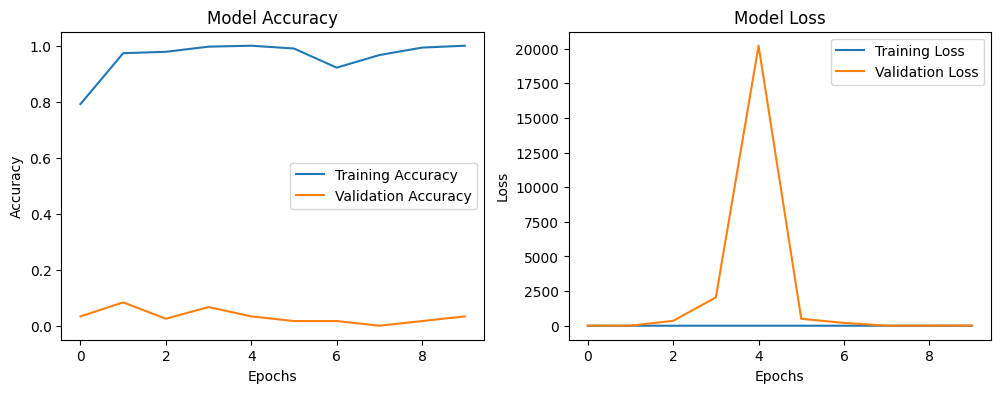

In [24]:
# Plotting the learning curves
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Predictions
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()